In [16]:
import numpy as np 
import pandas as pd 
import scipy
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression#sns.set()

In [2]:
df = pd.read_csv('105.csv')	
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


### Datenbereinigung

In [7]:
#na entfernen
print(df.isnull().sum())
df_dropna = df.dropna()
df_dropna.isnull().sum()


Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64


Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

In [8]:
df_dropna.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000,4025
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN,188
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627,NaN
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


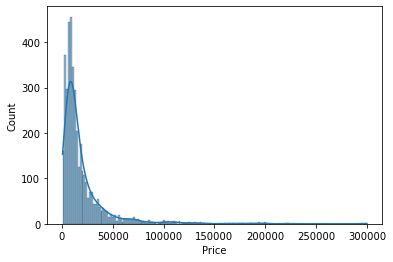

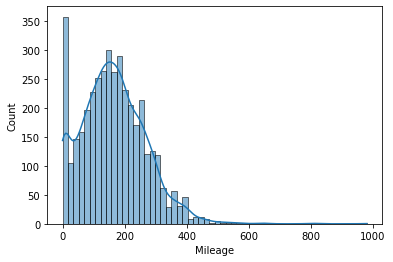

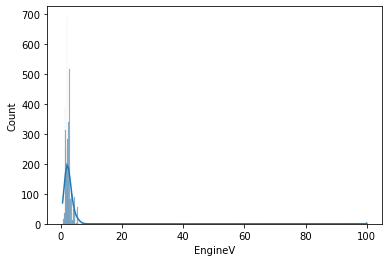

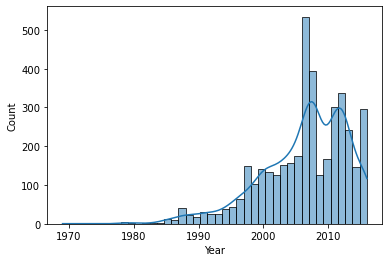

In [ ]:
#histogramm numerischer Spalten
numerical_columns = df_dropna.select_dtypes(include=['number']).columns
for i in numerical_columns:
    sns.histplot(df_dropna[i], kde=True)
    plt.show()

In [23]:
#ausreisser entfernen
def drop_outlier(df, field_list, sign, quantile=0.99):
    for i in field_list:
        q = df[i].quantile(quantile)
        if sign == "+":
            df = df[df[i] > q]
        elif sign == "-":
            df = df[df[i] < q]
    return df


df_no_outlier = drop_outlier(df_dropna, ["Price", "Mileage"], "-")
df_no_outlier.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3944,3944.000000,3944,3944.000000,3944.000000,3944,3944,3944.000000,3944
unique,7,NaN,6,NaN,NaN,4,2,NaN,299
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,867,NaN,1511,NaN,NaN,1825,3576,NaN,185
mean,NaN,17933.880822,NaN,161.484026,2.747612,NaN,NaN,2006.389959,NaN
std,NaN,19008.212025,NaN,96.027108,4.980406,NaN,NaN,6.595986,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21376.250000,NaN,230.000000,3.000000,NaN,NaN,2011.000000,NaN


In [24]:
#EngineV normalerweise zwischen 0.6 und 6.5, also ausreisser entfernen
df_enginev = df_no_outlier[df_no_outlier['EngineV'] < 6.5]

In [ ]:
##entferne alte Jahre
df_year = drop_outlier(df_enginev, ["Year"], "+", 0.01)
df_year.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000,3867
unique,7,NaN,6,NaN,NaN,4,2,NaN,291
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN,181
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853,NaN
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870,NaN
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000,NaN
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000,NaN


In [26]:
##index zurücksetzen
df_clean = df_year.reset_index(drop=True)

### Überprüfung der OLS-Annahmen

1. Linearität: Aufzeichen von x gegen z, um die Linearität zu überprüfen 

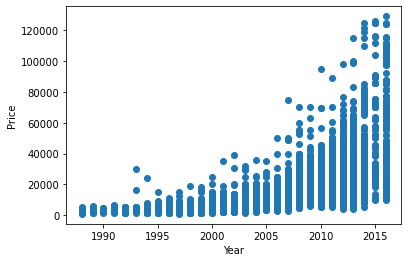

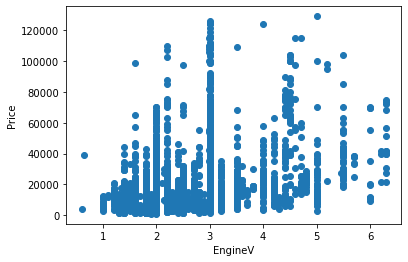

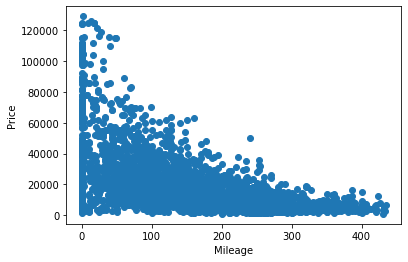

In [31]:
def plot_scatter(df, x_list, y):
    for x in x_list:
        plt.scatter(df[x], df[y])
        plt.xlabel(x)
        plt.ylabel(y)
        plt.show()
x_list = ["Year", "EngineV", "Mileage"]
plot_scatter(df_clean, x_list, "Price")

das Ergbnis ist nicht linear, weil der Preis nicht normal verteilt ist. Und wegen der Exponentialverteilung, können logarithmieren das Problem löschen 

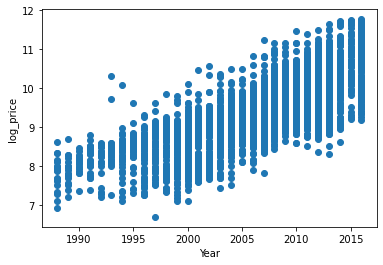

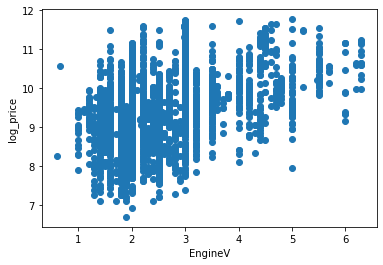

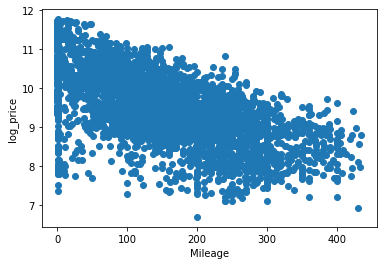

In [ ]:
df_clean['log_price'] = np.log(df_clean['Price'])
plot_scatter(df_clean, x_list, "log_price")

2. Endogenität: Das kann nicht von Datei checken, sondern von Überlegung.
3. Normalität und Homoskedastizität für Störgröße:
Normalität wird sichergestellt durch CLT, nullmittelwert wird durch die Einbeziehung des Achsenabschnitts sichergestellt, weil wir Logarithmus benutzt haben, zeigt das Aufzeichen von x gegen z die Homoskedastizität
4. keine Autokorrelation: Die uns vorliegenden Stichproben stammen nicht aus Zeitreihendaten oder Paneldaten, daher frei von diese Verletzung sind
5. Multikollinearität: je älter das Auto desto länger des Kiloometerstands, deswegen haben wir mehr oder weniger solche Problem

In [32]:
#Multikollinearität prüfen (kein sklearn Funktion dafür gibt)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["features"] = x_list
vif["VIF"] = [variance_inflation_factor(df_clean[x_list].values, i) for i in range(len(x_list))]
vif

,features,VIF
0,Year,10.354854
1,EngineV,7.662068
2,Mileage,3.791584


VIF größer als 5 gilt als problematisch, um Multikollinearität zu vermeiden, entnehmen wir Jahr hier, aber unter die folgende 3 Situation, kann Multikollinearität ignoniert werden
1. Die Variablen mit hohen VIFs sind Kontrollvariablen, und die Variablen von Interesse haben keine hohen VIFs.
2. Die hohen VIFs werden durch die Einbeziehung von Potenzen oder Produkten anderer Variablen verursacht.
3. Die Variablen mit hohen VIFs sind Indikatorvariablen (Dummyvariablen), die eine kategoriale Variable mit drei oder mehr Kategorien darstellen.
Quelle: https://statisticalhorizons.com/multicollinearity/

### Dummy-Variablen erstellen